In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [55]:
featurized_data = pd.read_csv('~/capstone_project/data/featurized_data.csv')

In [56]:
featurized_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 45 columns):
Unnamed: 0                   562 non-null int64
player_id                    562 non-null int64
display_name                 562 non-null object
height                       562 non-null int64
weight                       562 non-null int64
season_exp                   562 non-null int64
min_game                     562 non-null float64
min_tot                      562 non-null float64
attempt_at_rim_2_min         478 non-null float64
attempt_cut_run_2_min        478 non-null float64
attempt_drive_2_min          478 non-null float64
attempt_jumper_2_min         478 non-null float64
attempt_jumper_3_min         478 non-null float64
attempt_off_dribble_2_min    478 non-null float64
attempt_off_dribble_3_min    478 non-null float64
attempt_post_2_min           478 non-null float64
eff_at_rim_2                 460 non-null float64
eff_cut_run_2                447 non-null float64
eff_dr

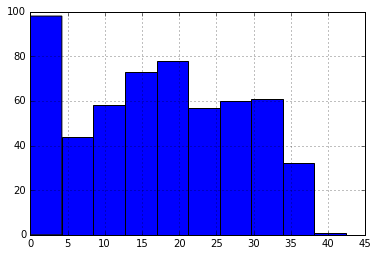

In [57]:
featurized_data.min_game.hist()

In [58]:
data_played = featurized_data[featurized_data.min_tot > 200]

In [59]:
data_played.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412 entries, 0 to 497
Data columns (total 45 columns):
Unnamed: 0                   412 non-null int64
player_id                    412 non-null int64
display_name                 412 non-null object
height                       412 non-null int64
weight                       412 non-null int64
season_exp                   412 non-null int64
min_game                     412 non-null float64
min_tot                      412 non-null float64
attempt_at_rim_2_min         412 non-null float64
attempt_cut_run_2_min        412 non-null float64
attempt_drive_2_min          412 non-null float64
attempt_jumper_2_min         412 non-null float64
attempt_jumper_3_min         412 non-null float64
attempt_off_dribble_2_min    412 non-null float64
attempt_off_dribble_3_min    412 non-null float64
attempt_post_2_min           412 non-null float64
eff_at_rim_2                 411 non-null float64
eff_cut_run_2                409 non-null float64
eff_dr

In [60]:
cols = data_played.columns
# for col in data_played.columns:
#     data_played[col].hist()

In [61]:
columns = data_played.drop(['Unnamed: 0','player_id','display_name'], axis=1).columns
columns = list(columns)

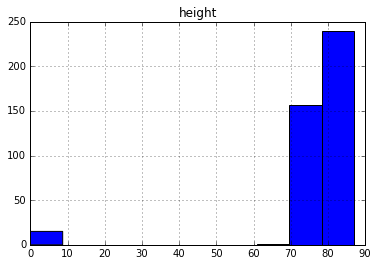

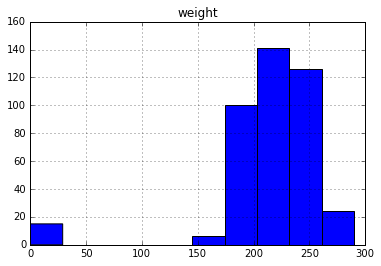

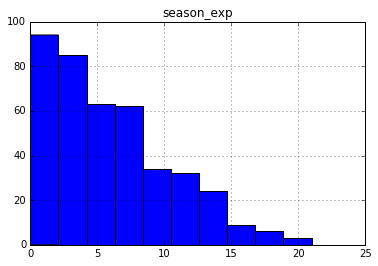

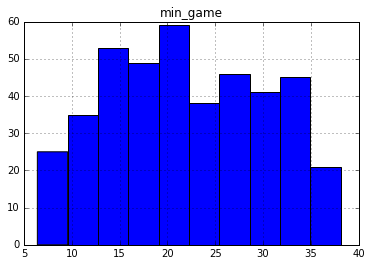

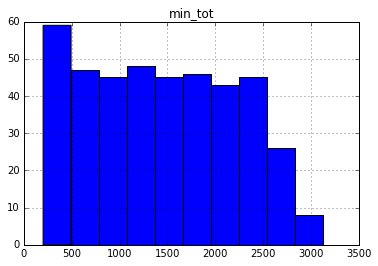

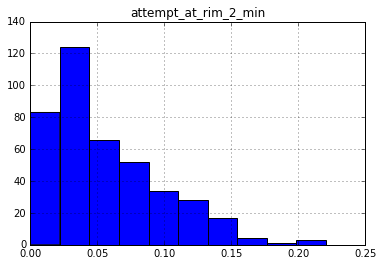

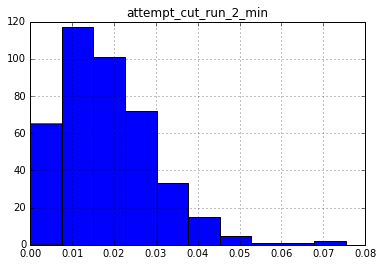

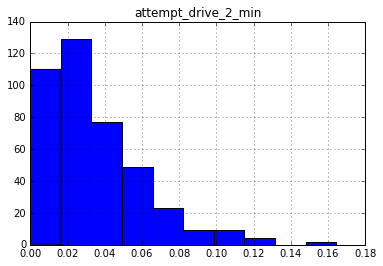

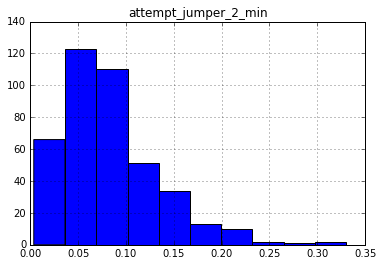

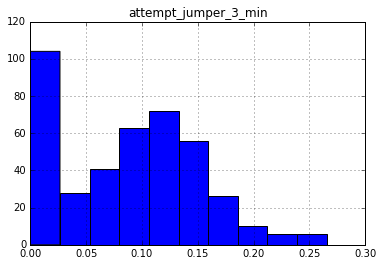

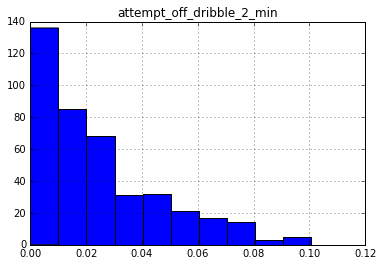

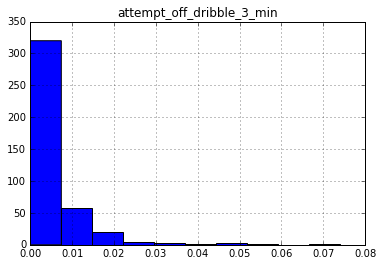

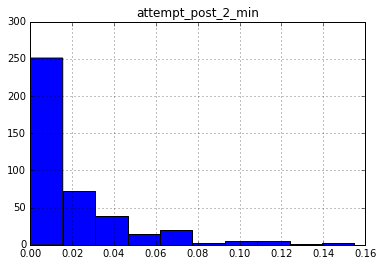

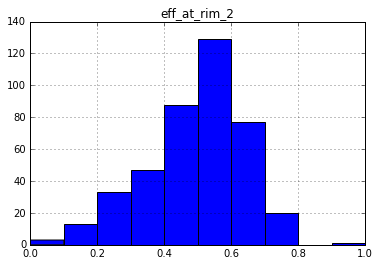

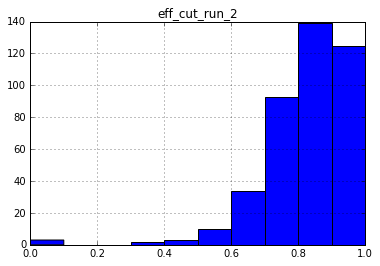

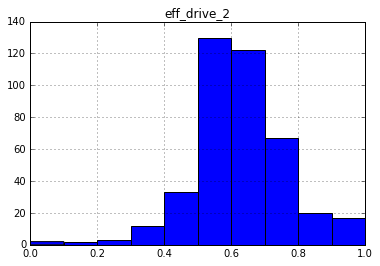

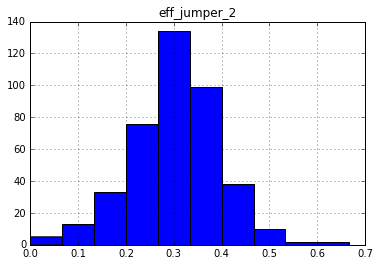

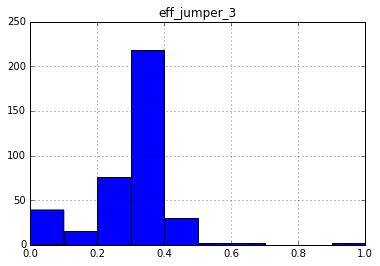

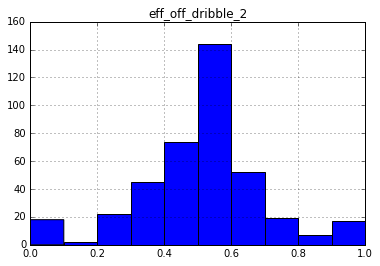

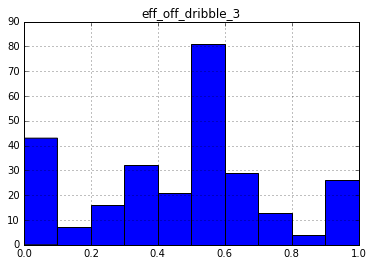

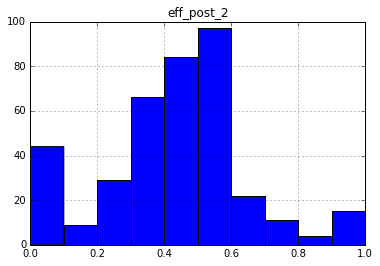

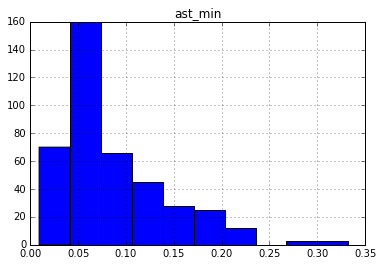

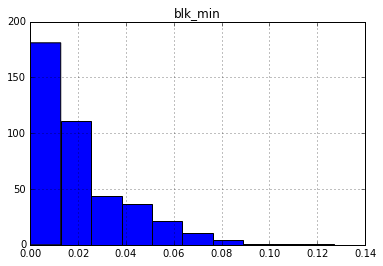

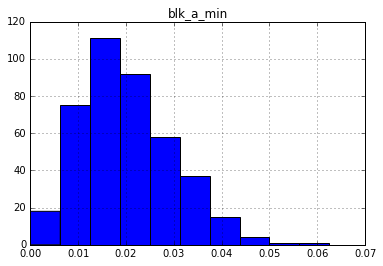

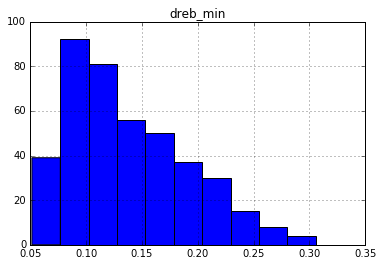

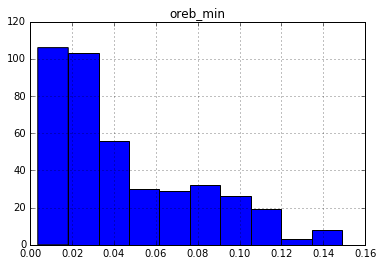

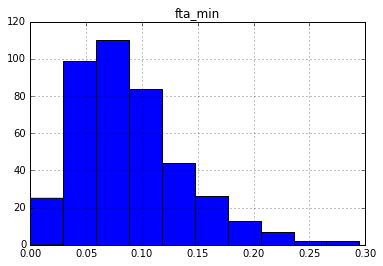

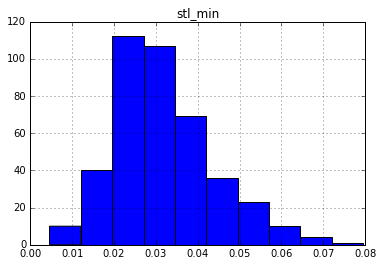

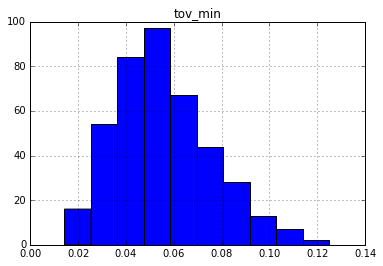

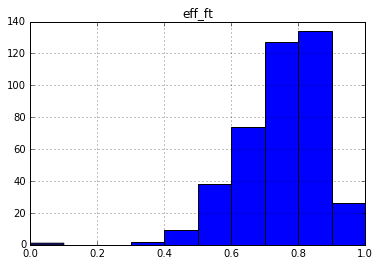

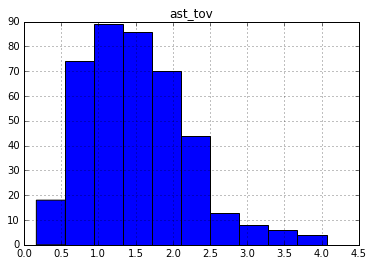

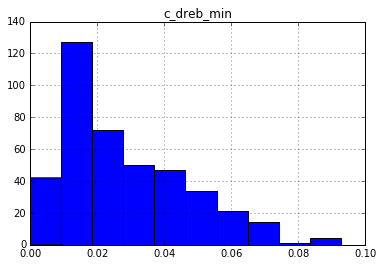

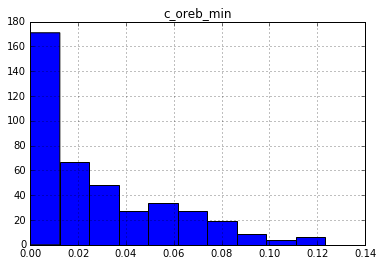

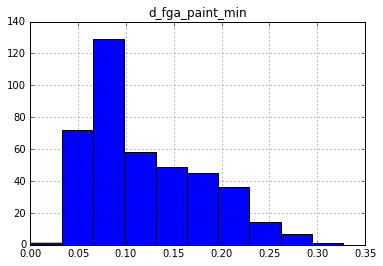

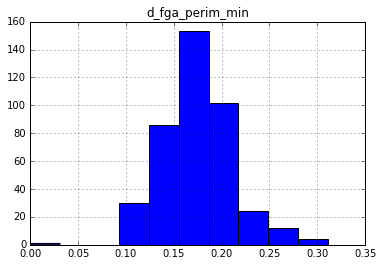

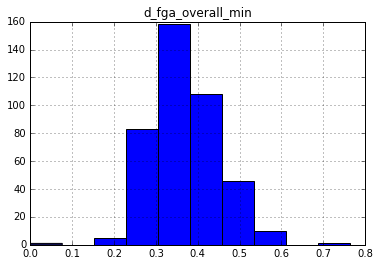

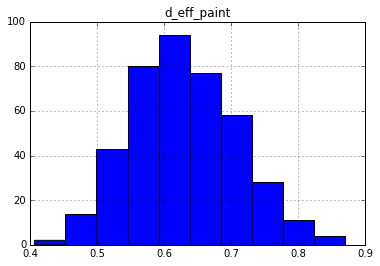

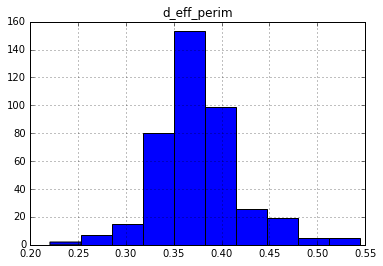

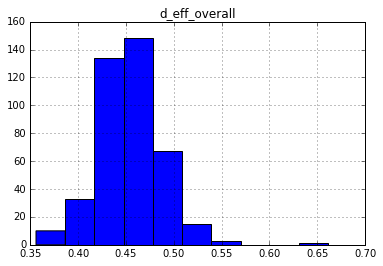

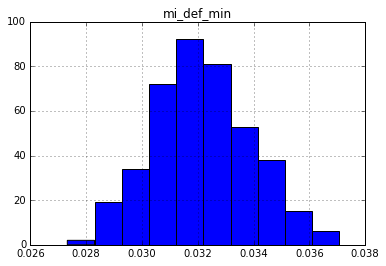

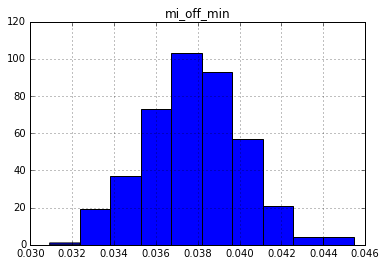

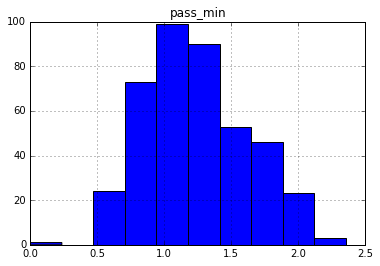

In [62]:
for col in columns:
    plt.figure()
    plt.title(col)
    data_played[col].hist();

In [42]:
correlations = data_played[columns].corr()


In [44]:
correlations.to_csv('~/capstone_project/data/correlations.csv')

remove age or season_exp
remove catch and shoot freq (too correlated with attempt jumper 3
remove both average speed vars - highly correlated with mi_def_min/mi_off_min
remove either all d_ppm or all d_eff
remove ast/tov 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123acf910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x123e6c390>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121957c10>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12628bed0>, ...,
       ..., 
        <matplotlib.axes._subplots.AxesSubplot object at 0x19de34fd0>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1005110>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a31b18d0>, ...,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a59aa090>]], dtype=object)

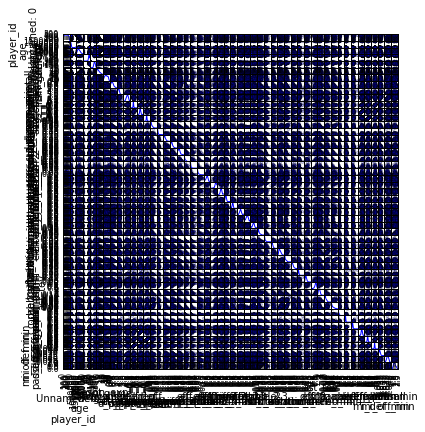

In [45]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data_played, alpha=0.2, figsize=(6, 6), diagonal='kde')

#nice visualization of group/cluster counts over a single variable distribution
#data.groupby('class').plas.hist(alpha=0.4)


#histograms for each cluster and variable, good for visualizing distribution of single variable for each cluster separately
#data.groupby('class').hist()
#examples: http://3qeqpr26caki16dnhd19sv6by6v.wpengine.netdna-cdn.com/wp-content/uploads/2014/06/histogram_class0.png

In [70]:
feats = data_played.iloc[:,4:]

In [71]:
feats.head()

,weight,season_exp,min_game,min_tot,attempt_at_rim_2_min,attempt_cut_run_2_min,attempt_drive_2_min,attempt_jumper_2_min,attempt_jumper_3_min,attempt_off_dribble_2_min,...,c_oreb_min,d_fga_paint_min,d_fga_perim_min,d_fga_overall_min,d_eff_paint,d_eff_perim,d_eff_overall,mi_def_min,mi_off_min,pass_min
0,240,21,14.6,554.8,0.025234,0.003605,0.003605,0.131579,0.001802,0.009012,...,0.014384,0.158904,0.133562,0.350000,0.607759,0.220513,0.418787,0.032192,0.037671,1.804795
1,212,19,28.2,1861.2,0.024178,0.006985,0.032775,0.169783,0.229422,0.049968,...,0.008511,0.055319,0.163475,0.260638,0.692308,0.388286,0.444898,0.029787,0.036170,0.852482
2,250,19,25.2,1537.2,0.078715,0.009758,0.012360,0.124252,0.001301,0.011059,...,0.053175,0.195238,0.118254,0.441270,0.534553,0.369128,0.440647,0.028571,0.034127,1.352778
3,220,18,16.8,1008.0,0.043651,0.008929,0.029762,0.060516,0.156746,0.018849,...,0.020833,0.069643,0.223810,0.336905,0.726496,0.390957,0.455830,0.030357,0.036310,1.145238
4,245,18,31.5,2362.5,0.017778,0.005503,0.015238,0.201905,0.143492,0.010582,...,0.012698,0.162222,0.182857,0.424444,0.587084,0.388889,0.472700,0.027937,0.033333,1.191429


In [76]:
np.std(feats.weight, axis=0)

48.822922383072935

In [77]:
np.mean(feats.weight, axis=0)

213.8106796116505

In [78]:
data_played.head()

,Unnamed: 0,player_id,display_name,height,weight,season_exp,min_game,min_tot,attempt_at_rim_2_min,attempt_cut_run_2_min,...,c_oreb_min,d_fga_paint_min,d_fga_perim_min,d_fga_overall_min,d_eff_paint,d_eff_perim,d_eff_overall,mi_def_min,mi_off_min,pass_min
0,0,708,Kevin Garnett,83,240,21,14.6,554.8,0.025234,0.003605,...,0.014384,0.158904,0.133562,0.350000,0.607759,0.220513,0.418787,0.032192,0.037671,1.804795
1,1,977,Kobe Bryant,78,212,19,28.2,1861.2,0.024178,0.006985,...,0.008511,0.055319,0.163475,0.260638,0.692308,0.388286,0.444898,0.029787,0.036170,0.852482
2,2,1495,Tim Duncan,83,250,19,25.2,1537.2,0.078715,0.009758,...,0.053175,0.195238,0.118254,0.441270,0.534553,0.369128,0.440647,0.028571,0.034127,1.352778
3,3,1713,Vince Carter,78,220,18,16.8,1008.0,0.043651,0.008929,...,0.020833,0.069643,0.223810,0.336905,0.726496,0.390957,0.455830,0.030357,0.036310,1.145238
4,4,1717,Dirk Nowitzki,84,245,18,31.5,2362.5,0.017778,0.005503,...,0.012698,0.162222,0.182857,0.424444,0.587084,0.388889,0.472700,0.027937,0.033333,1.191429
